<a href="https://colab.research.google.com/github/hoanqphann/DataAnalyst/blob/main/EDA_Ruou_Do.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phân loại chất lượng rượu đỏ

##**1.Định nghĩa vấn đề**

Phân tích và dự đoán chất lượng của rượu dựa vào bộ dữ liệu.


Giải thích biến:
*  **Fixed acidity (Độ axit cố định)**: Là các loại axit không bay hơi (không dễ bay hơi). Độ axit này được xác định bởi tổng lượng axit có trong mẫu. Axit cố định gồm các axit hữu cơ có độ bay hơi thấp như axit malic, lactic, tartaric hoặc citric — những thành phần đặc trưng cho mẫu rượu.
*   **Volatile acidity (Độ axit bay hơi)**: Là lượng axit axetic có trong rượu; nếu quá cao sẽ gây mùi vị khó chịu như giấm. Axit bay hơi gồm các axit hữu cơ mạch ngắn có thể tách ra khỏi mẫu bằng quá trình chưng cất như axit fomic, axit axetic, axit propionic và axit butyric.
*   **Citric acid (Axit citric)**: Có trong rượu với lượng nhỏ, giúp tạo vị “tươi mát” và hương vị dễ chịu. Đây là một axit hữu cơ yếu, không màu, có tự nhiên trong các loại trái cây họ cam quýt. Trong sinh hóa, nó là chất trung gian trong chu trình axit citric (chu trình Krebs) diễn ra trong quá trình trao đổi chất của sinh vật hiếu khí.
*   **Residual sugar (Lượng đường dư)**: Là lượng đường còn lại sau khi quá trình lên men dừng lại. Thông thường rượu hiếm khi có dưới 1 g/l đường. Lượng đường dư ảnh hưởng đến độ ngọt của rượu và được đo bằng gam đường trên mỗi lít (g/l). Ở EU, lượng đường dư còn được quy định để gắn nhãn phân loại rượu.
*   **Chlorides (Lượng muối)**: Là lượng ion chloride (Cl⁻) có trong rượu. Rượu đỏ thường có lượng chloride cao hơn do quá trình chiết xuất từ vỏ nho trong quá trình lên men. Nước ép nho đỏ không nên vượt quá 356 mg/L ion chloride, để rượu thành phẩm không vượt quá mức pháp lý tối đa 606 mg/L.
*   **Free sulfur dioxide (SO₂ tự do)**: Là dạng SO₂ tồn tại tự do trong dung dịch (dưới dạng khí hòa tan hoặc ion bisulfite). SO₂ tự do có khả năng phản ứng, mang tính kháng khuẩn và chống oxy hóa. Ngược lại, SO₂ liên kết là phần đã phản ứng với các phân tử khác trong rượu. Tổng hai phần này tạo nên tổng lượng SO₂.
*   **Total sulfur dioxide (Tổng SO₂)**: Là tổng lượng SO₂ tự do và SO₂ liên kết. Ở nồng độ thấp, SO₂ hầu như không được cảm nhận trong rượu, nhưng nếu cao có thể gây mùi khó chịu. Đây là chỉ tiêu quan trọng để kiểm soát chất lượng và độ bền của rượu.
*   **Density (Mật độ)**: Mật độ của rượu gần bằng nước, phụ thuộc vào hàm lượng cồn và đường. Dụng cụ đo mật độ là hydrometer — một ống thủy tinh có đầu nặng, dùng để đo tỉ trọng của rượu so với nước (gọi là “specific gravity”).
*   **pH**: Cho biết độ axit hoặc độ kiềm của rượu trên thang 0–14 (0: rất axit, 14: rất kiềm). Phần lớn rượu có pH từ 3 đến 4. Rượu có pH cao (>3,65) dễ bị hư hỏng do vi sinh vật. Vì vậy, người làm rượu thường bổ sung SO₂ (dưới dạng kali metabisulfite) để ổn định rượu trong quá trình ủ và bảo quản.
*   **Sulphates (Sunphat)**: Là phụ gia có thể góp phần hình thành khí SO₂, giúp diệt khuẩn và bảo quản rượu. Sulphate tự nhiên có sẵn ở mức thấp trong tất cả các loại rượu do quá trình lên men, nhưng cũng thường được bổ sung thêm. Một số người nhạy cảm với sulphite có thể bị đau đầu hoặc nghẹt mũi sau khi uống rượu có nồng độ cao.
*   **Alcohol (Nồng độ cồn)**: Là tỷ lệ phần trăm (%) cồn ethanol trong rượu — yếu tố chính ảnh hưởng đến hương vị, độ nặng và cảm giác khi uống.
*   **Quality (Chất lượng)**: Là biến đầu ra (output variable), được đánh giá dựa trên dữ liệu cảm quan (taste test) với thang điểm từ 3 đến 8.


## **2.Chuẩn bị vấn đề**

### **2.1.Khai báo thư viện**

In [ ]:
import pandas as pd  #for data manipulation operations
import numpy as np  #for numeric operations on data
import seaborn as sns  #for data visualization operations
import matplotlib.pyplot as plt  #for data visualization operations
from sklearn.preprocessing import LabelEncoder # for encoding
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #for standardization
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
from termcolor import colored
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
#!pip install lightgbm
from lightgbm import LGBMClassifier
#ignore warnings
import warnings
warnings.filterwarnings("ignore")
#see model parametres
from sklearn import set_config
set_config(print_changed_only = False)

print(colored("\n THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...", "green"))


 THE REQUIRED LIBRARIES WERE SUCCESFULLY IMPORTED...


### **2.2.Nạp dữ liệu**

In [ ]:
#load data
redwine = pd.read_csv('winequality-red.csv')


## **3.Mô tả thống kê**

#### **3.1. Hiển thị một số thông tin về dữ liệu**
+ Số dòng, số cột của dữ liệu
+ Kiểu dữ liệu của từng cột
+ 5 dòng đầu và 5 dòng cuối của bảng dữ liệu
+ Thông tin chung về dữ liệu

In [ ]:
# Get shape
print(f'+ Shape: {redwine.shape}')

# Get types
print(f'\n+ Data Types:\n{redwine.dtypes}')

# Check the first 5 rows (head)
print('\n+ First 5 rows:')
display(redwine.head(5))

# Check the last 5 rows (tail)
print('\n+ Last 5 rows:')
display(redwine.tail(5))

# info
print('\n + Basic Information: ')
redwine.info()

+ Shape: (1599, 12)

+ Data Types:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

+ First 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



+ Last 5 rows:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6



 + Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Thông tin cơ bản của bộ dữ liêu**

Bộ dữ liệu không có giá trị null(thiếu dữ liệu). Bộ dữ liệu gồm 1599 hàng và 12 cột. Kiểu dữ liệu của tất cả các biến đều là dạng số (numeric).

#### **3.2. Các tính chất thống kê trên dữ liệu số**
+ Count, Mean, Standard Deviation, Minimum Value
+ 25th Percentile, 50th Percentile (Median), 75th Percentile, Maximum Value

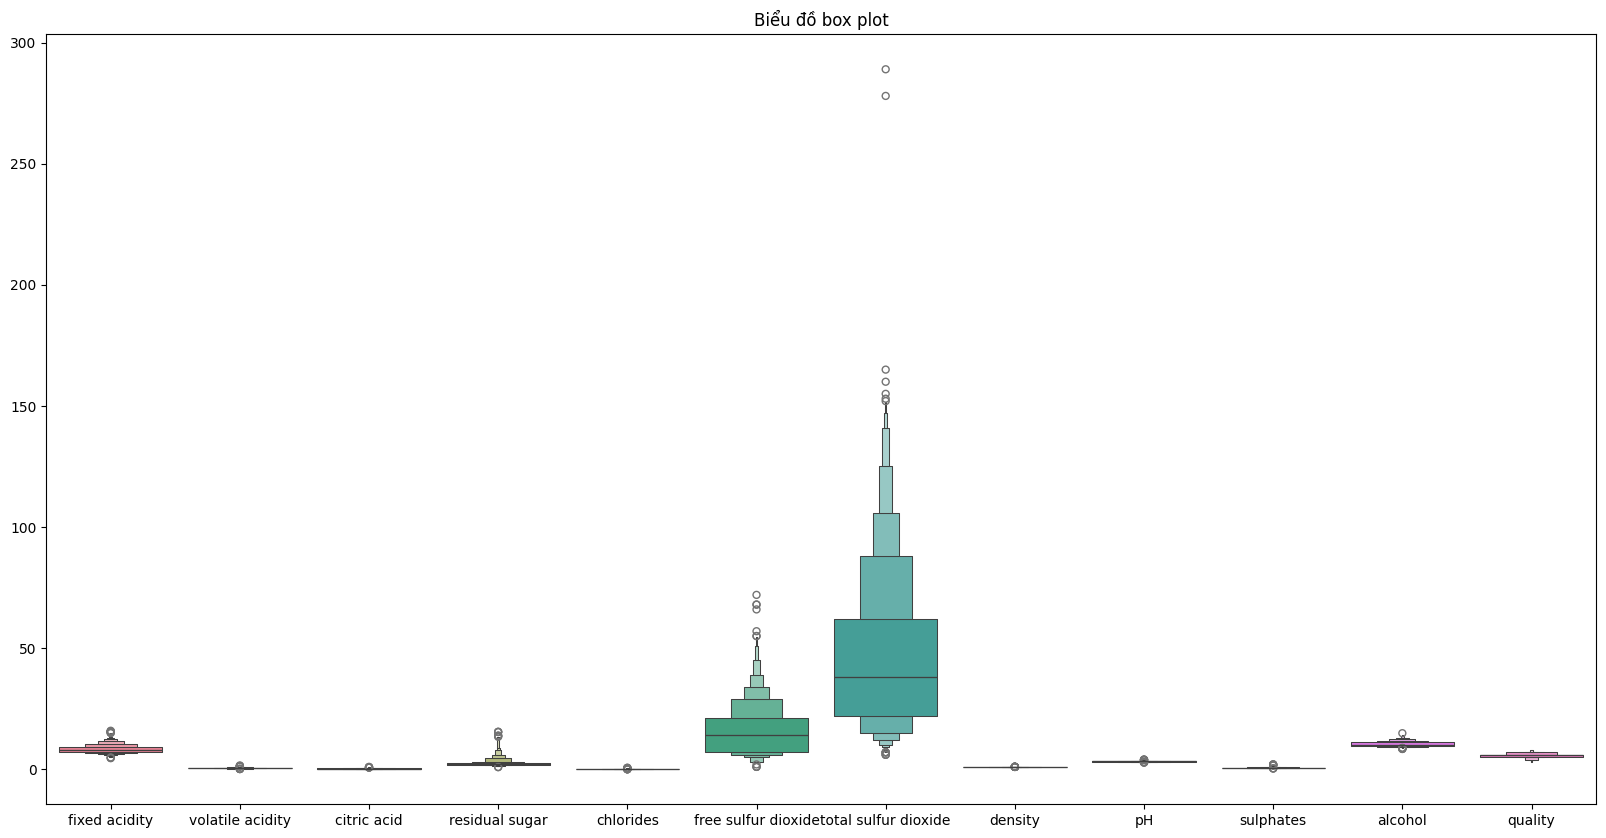

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
plt.figure(figsize=(20, 10))
sns.boxenplot(data=redwine)
plt.title('Biểu đồ box plot')
plt.savefig('boxplot.png')
plt.show()
print('\n')
redwine.describe()

**Dựa vào biểu đồ box plot và bảng thống kê mô tả của bộ dữ liệu ta thấy**

*   Giá trị trung bình của fixed acidity là 8.31, giá trị cao nhất là 15.9, giá trị thấp nhất là 4.6
*   Giá trị trung bình của volatile acidity là 0.52, giá trị cao nhất là 1.58, giá trị thấp nhất là 0.12
*   Giá trị trung bình của citric acid là 0.27, giá trị cao nhất là 1.0, giá trị thấp nhất là 0
*   Giá trị trung bình của residual sugar là 2.53, giá trị cao nhất là 15.5, giá trị thấp nhất là 0.9
*   Giá trị trung bình của chlorides là 0.08, giá trị cao nhất là 0.61, giá trị thấp nhất là 0.01
*   Giá trị trung bình của free sulfur dioxide là 15.87, giá trị cao nhất là 72, giá trị thấp nhất là 1
*   Giá trị trung bình của total sulfur dioxide là 46.46, giá trị cao nhất là 289, giá trị thấp nhất là 6
*   Giá trị trung bình của density là 0.996, giá trị cao nhất là 1, giá trị thấp nhất là 0.990
*   Giá trị trung bình của pH	 là 3.31, giá trị cao nhất là 4.01, giá trị thấp nhất là 2.74
*   Giá trị trung bình của sulphates là 0.65, giá trị cao nhất là 2, giá trị thấp nhất là 0.33
*   Giá trị trung bình của alcohol là 10.4, giá trị cao nhất là 14.9, giá trị thấp nhất là 8.4
*   Giá trị trung bình của quality là 5.63, giá trị cao nhất là 8, giá trị thấp nhất là 3

#### **3.3. Kiểm tra tính toàn vẹn của dữ liệu**

Kiểm tra dữ liệu bị trùng lặp

In [ ]:
print("Số dữ liệu bị trùng lập: {} ".format(redwine.isnull().sum().sum()))

Số dữ liệu bị trùng lập: 0 


## **4.EDA và trực quan hóa dữ liệu**

### **4.1.Phân tích đơn biến (Univariable Analysis)**

### **4.2.Phân tích đa biến (Multivariable Analysis)**

## **5. Kết luận**

# **Kết thúc**